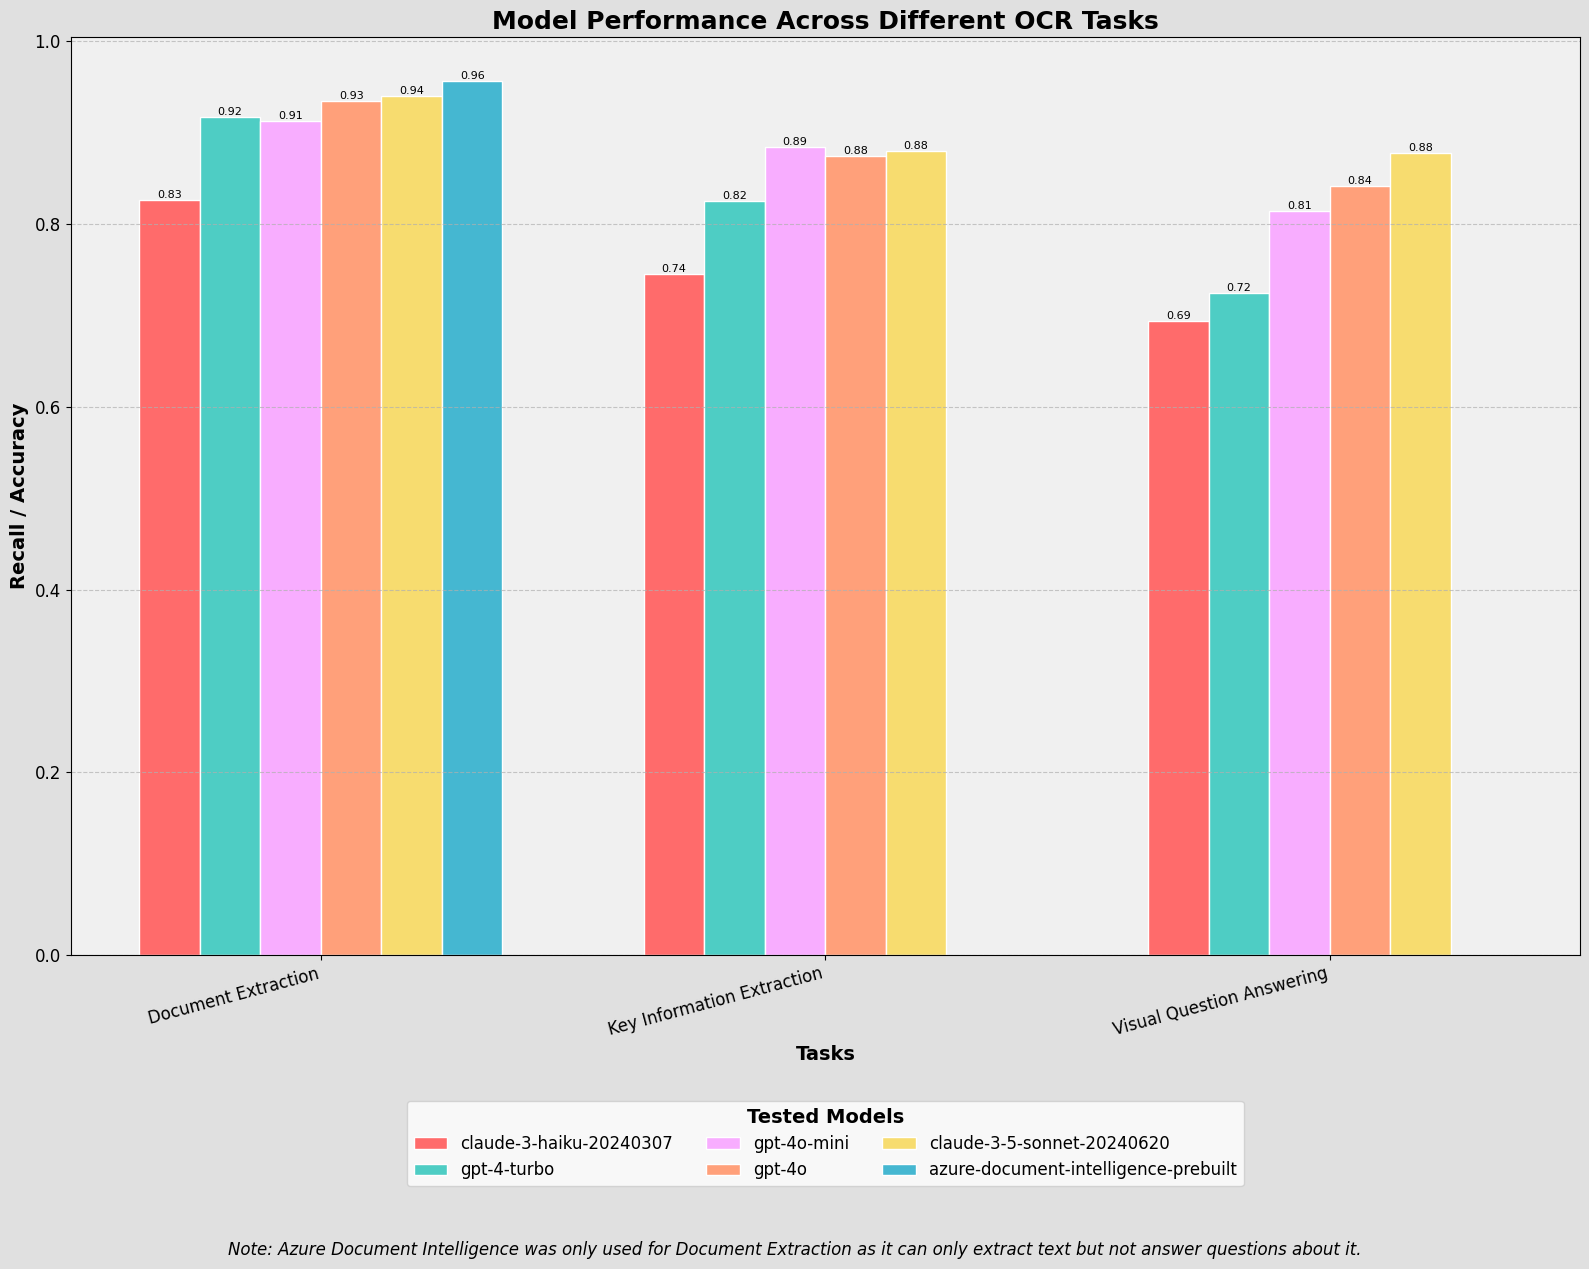

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Load data from JSON files
with open('funsd_benchmark_results.json', 'r') as f:
    funsd_data = json.load(f)

with open('key_info_results.json', 'r') as f:
    key_info_data = json.load(f)

with open('doc_vqa_results.json', 'r') as f:
    doc_vqa_data = json.load(f)

# Prepare data
tasks = ["Document Extraction", "Key Information Extraction", "Visual Question Answering"]
models = ["claude-3-haiku-20240307", "gpt-4-turbo", "gpt-4o-mini", "gpt-4o", "claude-3-5-sonnet-20240620", "azure-document-intelligence-prebuilt"]

# Calculate average recall for each model and task
results = {
    "Document Extraction": {},
    "Key Information Extraction": {},
    "Visual Question Answering": {}
}

for model in models:
    if model in funsd_data:
        results["Document Extraction"][model] = np.mean([example['recall'] for example in funsd_data[model]])
    else:
        results["Document Extraction"][model] = 0

    if model in key_info_data:
        results["Key Information Extraction"][model] = np.mean([example['match'] for example in key_info_data[model]])
    else:
        results["Key Information Extraction"][model] = 0

    if model in doc_vqa_data:
        results["Visual Question Answering"][model] = np.mean([example['match'] for example in doc_vqa_data[model]])
    else:
        results["Visual Question Answering"][model] = 0

# Set up the plot
plt.figure(figsize=(16, 12))  # Increased figure height to accommodate legend
width = 0.12
x = np.arange(len(tasks))

# Custom color palette
colors = ['#FF6B6B', '#4ECDC4', '#f8adff', '#FFA07A', '#F7DC6F', '#45B7D1']

# Plot bars for each model
for i, model in enumerate(models):
    values = [results[task][model] for task in tasks]
    plt.bar(x + i*width, values, width, label=model, color=colors[i], edgecolor='white', linewidth=1)

# Customize the plot
plt.xlabel('Tasks', fontsize=14, fontweight='bold')
plt.ylabel('Recall / Accuracy', fontsize=14, fontweight='bold')
plt.title('Model Performance Across Different OCR Tasks', fontsize=18, fontweight='bold')
plt.xticks(x + width*2.5, tasks, fontsize=12, rotation=15, ha='right')
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the legend
legend = plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3, fontsize=12)
plt.setp(legend.get_title(), fontsize=14, fontweight='bold')

# Add "Tested Models" header to the legend
# Center the legend box
plt.setp(legend.get_title(), multialignment='center')
legend.set_title("Tested Models", prop={'size': 14, 'weight': 'bold'})

# Add value labels on top of each bar
for i, model in enumerate(models):
    for j, task in enumerate(tasks):
        value = results[task][model]
        if value > 0:  # Only show labels for non-zero values
            plt.text(j + i*width, value, f'{value:.2f}', ha='center', va='bottom', fontsize=8, rotation=0)

# Improve the layout
plt.tight_layout()

# Add a fancy background
plt.gca().set_facecolor('#F0F0F0')
plt.gcf().set_facecolor('#E0E0E0')

# Add a title explanation with adjusted position
plt.figtext(0.5, -0.05, "Note: Azure Document Intelligence was only used for Document Extraction as it can only extract text but not answer questions about it.", 
            ha='center', fontsize=12, style='italic')

# Adjust subplot parameters to give space for legend and note
plt.subplots_adjust(bottom=0.2)

# Save the plot
plt.savefig('combined_ocr_benchmark_results.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()